In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv')

df.set_index('date', inplace=True)

df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [3]:
df['value'].quantile(0.025)

17876.4

In [4]:
df = df[(df['value'] > df['value'].quantile(0.025)) & (df['value'] < df['value'].quantile(0.975))]

df

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325
...,...
2019-11-24,138875
2019-11-29,171584
2019-11-30,141161


Text(0, 0.5, 'Page Views')

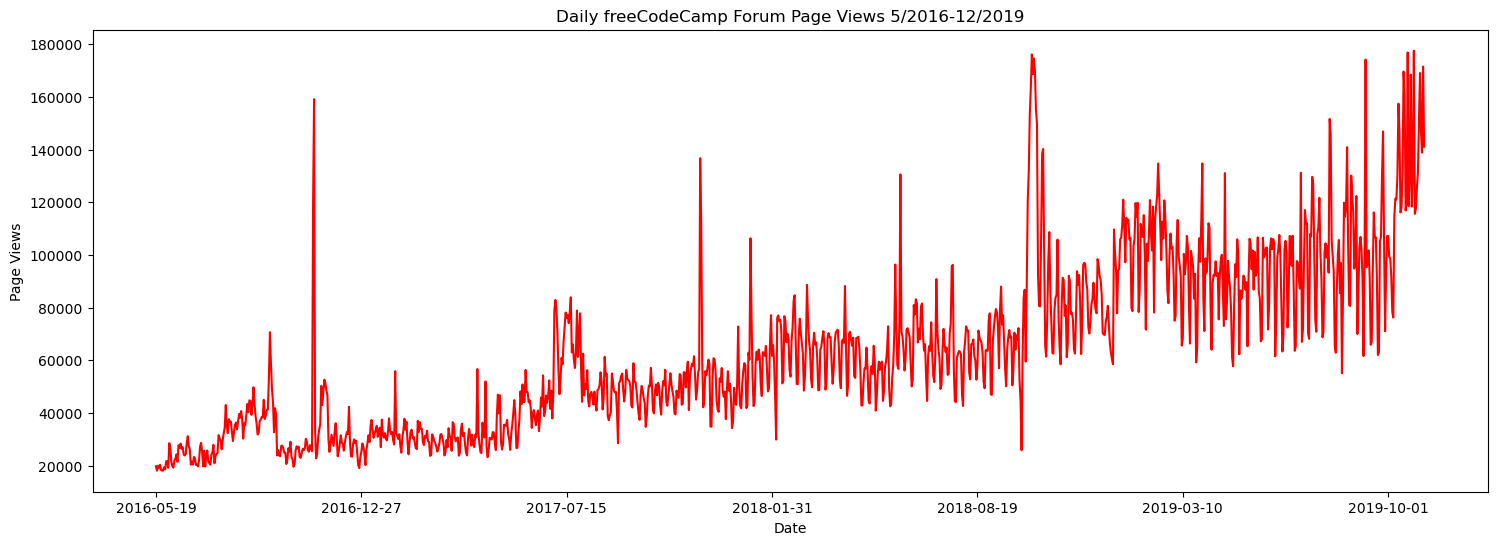

In [5]:
df_line = df.loc['2016-05':'2019-12'].plot(figsize=(18, 6), color='red', legend=False)
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xlabel('Date')
plt.ylabel('Page Views')

In [33]:
pd.to_datetime(df.index)

DatetimeIndex(['2016-05-19', '2016-05-26', '2016-05-27', '2016-05-28',
               '2016-05-29', '2016-06-07', '2016-06-08', '2016-06-09',
               '2016-06-14', '2016-06-15',
               ...
               '2019-11-16', '2019-11-17', '2019-11-20', '2019-11-21',
               '2019-11-23', '2019-11-24', '2019-11-29', '2019-11-30',
               '2019-12-01', '2019-12-03'],
              dtype='datetime64[ns]', name='date', length=1238, freq=None)

<BarContainer object of 1238 artists>

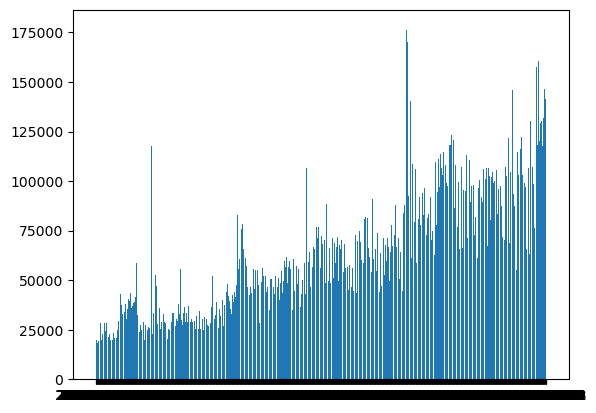

In [29]:
value = df['value']
positions = range(len(value))
plt.xticks(positions, df.index)
plt.bar(positions, df['value'])

In [47]:
df.index = pd.to_datetime(df.index)
df_bar = df.resample('ME').mean()
df_bar

,value
date,
2016-05-31,19432.400000
2016-06-30,21875.105263
2016-07-31,24109.678571
2016-08-31,31049.193548
2016-09-30,41476.866667
2016-10-31,27398.322581
2016-11-30,40448.633333
2016-12-31,27832.419355
2017-01-31,32785.161290


Text(0.5, 1.0, 'Average Daily Page Views per Month')

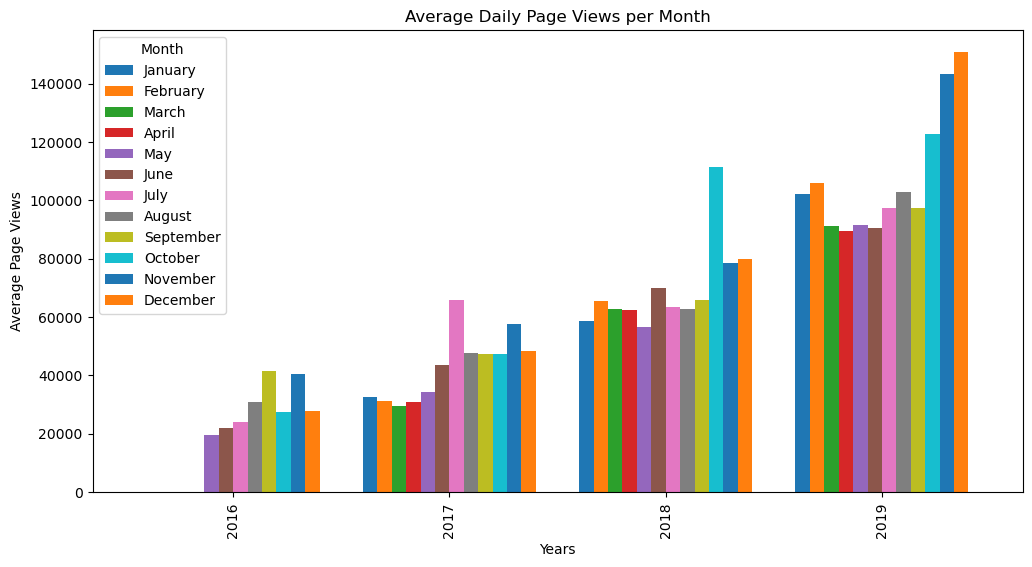

In [71]:
df.index = pd.to_datetime(df.index)
df_bar = df.resample('ME').mean()
df_bar['Year'] = df_bar.index.year
df_bar['Month'] = df_bar.index.strftime('%B')
df_bar = df_bar.pivot_table(values='value', index='Year', columns='Month', aggfunc='mean')
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
df_bar = df_bar[month_order]
ax = df_bar.plot(kind='bar', figsize=(12, 6), width=0.8)

plt.xlabel("Years")
plt.ylabel("Average Page Views")
plt.title("Average Daily Page Views per Month")

In [153]:
df.index = pd.to_datetime(df.index)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

Text(0, 0.5, 'Page Views')

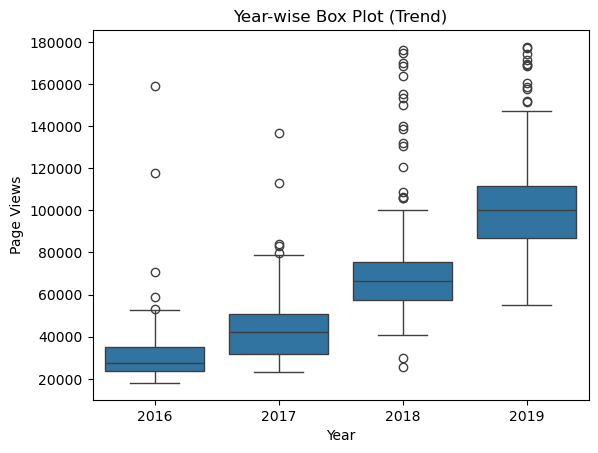

In [221]:
ax = sns.boxplot(x=df_box['year'].astype(str), y=df_box['value'])

ax.set_title('Year-wise Box Plot (Trend)')
ax.set_xlabel('Year')
ax.set_ylabel('Page Views')

Text(0, 0.5, 'Page Views')

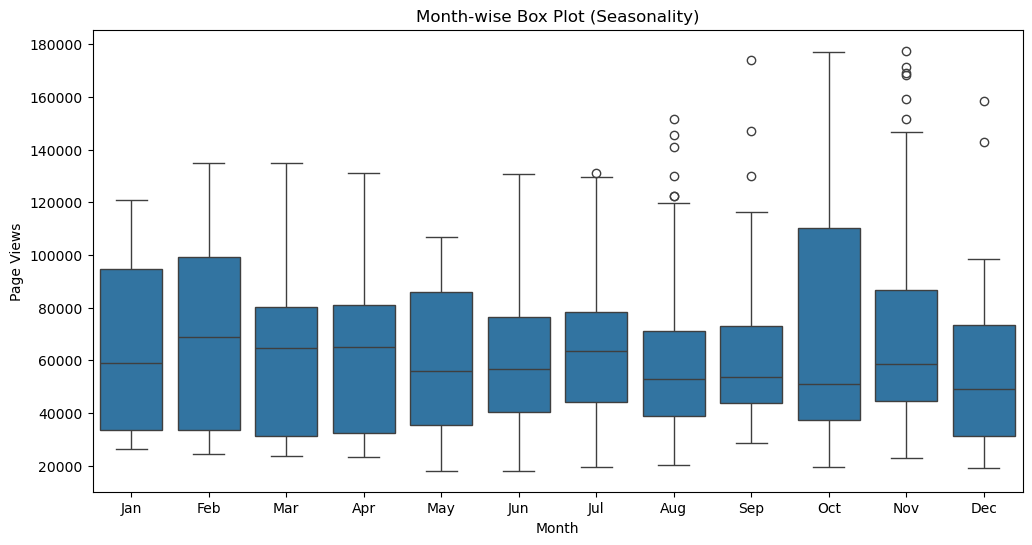

In [223]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(x=df_box['month'], y=df_box['value'], order=month_order, ax=ax)

ax.set_title('Month-wise Box Plot (Seasonality)')
ax.set_xlabel('Month')
ax.set_ylabel('Page Views')